In [1]:
#This project contains the updated version of the Python code to replicate all results contained in our EIT paper
#Data generation, Bias computation, Debiasing (both AD & ROC)
#Impacts generated at group level from our approach

# Initial Configuration


## Python requirements

In [2]:

## Requirements


## Uninstall conflicting packages

## Kapre [[https://github.com/keunwoochoi/kapre]]
!pip3 uninstall --yes kapre

# Datascience [[https://github.com/data-8/datascience]]
!pip3 uninstall --yes datascience


## Install necessary packages

## NumPy [[https://numpy.org]]
!pip3 install numpy~=1.19.5

## Pandas [[https://pandas.pydata.org]]
!pip3 install pandas~=1.1.5

## scikit-learn [[https://scikit-learn.org]]
!pip3 install sklearn~=0.0
!pip3 install scikit-learn~=0.22.2

## SciPy [[https://www.scipy.org]]
!pip3 install scipy~=1.4.1

## Matplotlib [[https://matplotlib.org]]
!pip3 install matplotlib~=3.2.2

## Shap [[https://github.com/slundberg/shap]]
!pip3 install shap~=0.39.0

## IPython [[https://ipython.org]]
!pip3 install ipython~=5.5.0

## Lazy Streams [[https://pypi.org/project/lazy-streams]]
!pip3 install lazy-streams~=0.5

## pytest [[https://docs.pytest.org]]
!pip3 install pytest~=3.6.4

## Tensorflow [[https://www.tensorflow.org]]
!pip3 install tensorflow==1.13.1

## Aequitas [[https://github.com/dssg/aequitas]]
!pip3 install aequitas~=0.42.0

## AIF360 [[https://aif360.mybluemix.net]]
!pip3 install aif360[all]~=0.4.0

## Fairlearn [[https://fairlearn.github.io]]
!pip3 install fairlearn~=0.6.2

## list all packages
!pip3 list --verbose 


Found existing installation: kapre 0.3.6
Uninstalling kapre-0.3.6:
  Successfully uninstalled kapre-0.3.6
Found existing installation: datascience 0.10.6
Uninstalling datascience-0.10.6:
  Successfully uninstalled datascience-0.10.6
     |████████████████████████████████| 7.1 MB 21.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.2.post1 which is incompatible.
     |████████████████████████████████| 356 kB 26.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491658 sha256=df4546faa20905dbcd6f9dc1b546d492bbc31f1845cac8a7a243667c35010619
  Stored in directory: /roo

## Modules

### module_chain_creation

In [3]:

import random as ran
from typing import List, Tuple
import numpy as np
import pandas as pd


def link_two_double(x1, x2, weights) :
    """creating a dependent target value from a given independent value"""

    y = []
    for a in np.arange(len(x1)):
        if x1[a]==1 and x2[a]==1:
             y.append(ran.choices([0, 1], weights=[weights[0], 1- weights[0]])[0])
        elif x1[a]==0 and x2[a]==0:
             y.append(ran.choices([0, 1], weights=[weights[1], 1- weights[1]])[0])
        elif x1[a]==1 and x2[a]==0:
             y.append(ran.choices([0, 1], weights=[weights[2], 1- weights[2]])[0])
        else:
             y.append(ran.choices([0, 1], weights=[weights[3], 1- weights[3]])[0])
    yy = pd.Series(y)
    return yy


def new_data_double(df: pd.DataFrame, feature: List[str], weights: List[int]) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """creating a new version of a given dataframe on the basis of two given features 
    by redefining the second feature by linking it to the first feature"""

    df_new = df.copy()
    df_new[feature[2]] = link_two_double(df[feature[0]],df[feature[1]], weights)
    outline_1 = feature[0] + '_vs_' + feature[2] + ":"
    outline_2 = feature[1] + '_vs_' + feature[2] + ":"
    capture_change_1 = pd.DataFrame({"correlation_before": [cor(df, [feature[0], feature[2]])],
                                   "correlation_after": [cor(df_new, [feature[0], feature[2]])]
                                   })
    capture_change_2 = pd.DataFrame({"correlation_before": [cor(df, [feature[1], feature[2]])],
                                   "correlation_after": [cor(df_new, [feature[1], feature[2]])]
                                   })
    print(outline_1)
    print(capture_change_1)
    print(outline_2)
    print(capture_change_2)
    return capture_change_1, capture_change_2, df_new



### module_chain_maker


In [4]:
import random as ran
from typing import List
from typing import Tuple

import numpy as np
import pandas as pd


#
# new_simulating_GD_versions
#

# data_num = data.assign(
#     classification=lambda x: np.where(x['classification'] == 1, 0, 1),  # 1: bad_credibility 0:good_credibility
#     only_gender=lambda x: np.where((x['status_and_gender'] == 'A92') | (x['status_and_gender'] == 'A95'), 1, 0),
#     # 1: female
#     foreign_worker=lambda x: np.where(x['foreign_worker'] == 'A201', 1, 0),  # 1: foreign worker  ### We are now using age/categorical, replacing nationality [to check]
#     age=lambda x: np.where(x['age'] <= 30, "30_or_younger", "older_than_30"),
# )

# ### connecting functions [TO DO: we need to create the code to make our chain longer/math component / this is for the ''second'' paper --> empirical study]

def link_two(x: pd.Series, weights: List[int]) -> pd.Series:
    """creating a dependent target value from a given independent value"""

    y = []
    for value in x:
        if value == 1:
            y.append(ran.choices([0, 1], weights=[weights[0], weights[1]])[0])
        else:
            y.append(ran.choices([0, 1], weights=[weights[1], weights[0]])[0])
    yy = pd.Series(y)
    return yy


def cor(df: pd.DataFrame, feature: List[str]) -> np.ndarray:
    """estimating Pearson correlation between two binary features"""

    r = np.corrcoef(df[feature[0]].to_numpy(), df[feature[1]].to_numpy())
    return r[0, 1]


def new_data(df: pd.DataFrame, feature: List[str], weights: List[int]) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """creating a new version of a given dataframe on the basis of two given features
    by redefining the second feature by linking it to the first feature"""

    df_new = df.copy()
    df_new[feature[1]] = link_two(df[feature[0]], weights)
    outline = feature[0] + '_vs_' + feature[1] + ":"
    capture_change = pd.DataFrame({"correlation_before": [cor(df, [feature[0], feature[1]])],
                                   "correlation_after": [cor(df_new, [feature[0], feature[1]])]
                                   })
    print(outline)
    print(capture_change)
    return capture_change, df_new


def chain_together(df: pd.DataFrame, features: List[str], weights: List[List[int]]) -> pd.DataFrame:
    """chaining together several dataframe recreations in order to create a latent story inside the original dataset"""

    print("correlations_in_the_chain:__")
    print("........................")
    df_now = df.copy()
    a = 0
    while a < len(features) - 1:
        step_1 = new_data(df_now, [features[a], features[a + 1]], [weights[a][0], weights[a][1]])[1]
        a += 1
        df_now = step_1
    outline_beginning_end = 'correlation_between_two_ends___:' + features[0] + '_vs_' + features[
        len(features) - 1] + ":"
    print("........................")
    print(outline_beginning_end)
    print(cor(df_now, [features[0], features[len(features) - 1]]))
    return df_now



### module_aware_unaware

In [5]:
from typing import Tuple

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression


#
# aware_unware_LogReg_analysis_of_simulated_datasets.py
#

def prepare_premise(csv_path: str, protected_attribute: str, drop_protected_attribute: bool) \
        -> Tuple[pd.DataFrame, pd.DataFrame, LogisticRegression, pd.DataFrame]:
    """ reads the simulated dataset from a given path,
    eliminates unnecessary features, converts binary vectors into dummy variable structures
    by eliminating reference categories, fits a logistic regression model,
    extracts predictions, generates a premise dataset that consists of true values, predictions
    and protected attribute=protected_attribute values"""

    df = pd.read_csv(csv_path)

    not_needed = ['existing_checking', 'duration', 'credit_history', 'purpose',
                  'credit_amount', 'savings', 'employment_since', 'installment_rate',
                  'status_and_gender', 'other_debtors', 'residence_since', 'property',
                  'age', 'other_installment_plans', 'housing', 'existing_credits', 'job',
                  'people_liable', 'telephone', 'foreign_worker']

    # references:
    # savings: A64 : .. >= 1000 DM
    # property: A121 : real estate
    # purpose: A40 : car (new)
    # credit_history: A32 : existing credits paid back duly till now
    # housing : A152 : own
    # job : A173 : skilled employee / official
    # other_installment_plans: A141 : bank
    # other_debtors: A101 : none
    # age_older_than_ ###### add this as reference #####

    references = ['savings_A64', 'property_A121', 'purpose_A40', 'credit_history_A32', 'housing_A152', 'job_A173',
                  'other_installment_plans_A141', 'other_debtors_A101', "age_older_than_30"]

    reduced_data = df.drop(not_needed, axis=1)
    df_referenced = reduced_data.drop(references, axis=1)

    features = df_referenced.drop("classification", axis=1)
    target = df_referenced["classification"]

    # print(features.columns)

    if drop_protected_attribute:
        features = features.drop([protected_attribute], axis=1)

    log_reg = LogisticRegression(random_state=0)

    model = log_reg.fit(features, target)

    predictions = model.predict(features)

    importance = pd.DataFrame({"features": list(features.columns), "parameters": list(model.coef_[0])}).sort_values(
        by=["parameters"], ascending=False)

    importance = importance.set_index("features")

    # print(importance)

    premise = pd.DataFrame({"target_now": target, "prediction_now": predictions, protected_attribute: df[protected_attribute]})

    return (premise, importance, model, features)


def compare_aware_unaware(csv_path: str) -> pd.DataFrame:
    aware = prepare_premise(csv_path, drop_protected_attribute=False)[1]
    unaware = prepare_premise(csv_path, drop_protected_attribute=True)[1]
    merged = pd.merge(aware, unaware, left_on="features", right_on="features")
    prop = pd.Series(merged[merged.columns[0]] / merged[merged.columns[1]]).abs()
    outcome = merged.rename(columns={'parameters_x': "aware_model", "parameters_y": "unaware_model"})
    outcome["absolute_proportion"] = prop
    outcome = outcome.sort_values(by=["absolute_proportion"], ascending=False)
    shift = pd.Series(np.where(outcome["aware_model"] < outcome["unaware_model"], "INCReased", "decrEASED"))
    outcome["nature_of_change"] = shift.values
    return outcome



### module_bias_analysis

In [6]:
import numpy as np

def fairness_analysis(df_data, threshold, disparity_tolerance, attributes_and_reference_groups, metrics):
    print(threshold)
    df_data['Predict'] = np.where(df_data['probabilities'] > threshold, 1, 0)
    df_data['score'] = df_data['prediction_now']
    df_data['label_value'] = df_data['target_now']
    attributes_to_audit = list(attributes_and_reference_groups.keys())

    # Initialize Aequitas
    g = Group()

    # get_crosstabs returns a dataframe of the group countsa
    xtab, _ = g.get_crosstabs(df_data, attr_cols=attributes_to_audit)
    absolute_metrics = g.list_absolute_metrics(xtab)

    b = Bias()
    bdf = b.get_disparity_predefined_groups(xtab, original_df=df_data, ref_groups_dict=attributes_and_reference_groups)

    f = Fairness()
    fdf = f.get_group_value_fairness(bdf)

    return (xtab, bdf, fdf)


def show_confusion_matrix(xtab):
    g = Group()
    absolute_metrics = g.list_absolute_metrics(xtab)
    cm = xtab[[col for col in xtab.columns if col not in absolute_metrics]]
    cm = cm.drop(cm.columns[0:3], axis=1)
    return (cm)


def absolute_fairness_estimates(xtab):
    return (xtab[['attribute_name', 'attribute_value'] + metrics].round(4))


def relative_fairness_estimates(bdf):
    print(bdf[['attribute_name', 'attribute_value', 'fdr_disparity', 'for_disparity', 'fnr_disparity',
               'fpr_disparity']].style)
    return (bdf[['attribute_name', 'attribute_value', 'fdr_disparity', 'for_disparity', 'fnr_disparity',
                 'fpr_disparity']].style)


# def relative_fairness_estimates(bdf):
#    print(bdf[['attribute_name', 'attribute_value','for_disparity','fnr_disparity']].style)
#    return(bdf[['attribute_name', 'attribute_value','for_disparity','fnr_disparity']].style)


def visualize_all_with_dots(bdf):
    return (ap.summary(bdf, metrics, fairness_threshold=disparity_tolerance))


def visualize_single_for_all_metrics(bdf, my_feature):
    return (ap.disparity(bdf, metrics, my_feature, fairness_threshold=disparity_tolerance))


def visualize_all_variables_for_single_metric(xtab, my_metric):
    aqp = Plot()
    return (aqp.plot_group_metric(xtab, my_metric))


def visualize_pass_fail_for_single_metric(fdf, my_metric):
    aqp = Plot()
    return (aqp.plot_fairness_group(fdf, group_metric=my_metric, title=True))



### module_data_preparation

In [7]:
import pandas as pd


def prepare_data(csv_path: str, protected_attribute: str) -> pd.DataFrame:
    """ reads the simulated dataset from a given path,
    eliminates unnecessary features, converts binary vectors into dummy variable structures
    by eliminating reference categories, fits a logistic regression model,
    extracts predictions, generates a premise dataset that consists of true values, predictions
    and protected attribute=gender values"""

    df = pd.read_csv(csv_path)
    df.set_index([protected_attribute], append=True, inplace=True)  # this is essential to for later steps

    not_needed = [
        'existing_checking', 'duration', 'credit_history', 'purpose',
        'credit_amount', 'savings', 'employment_since', 'installment_rate',
        'status_and_gender', 'other_debtors', 'residence_since', 'property',
        'age', 'other_installment_plans', 'housing', 'existing_credits', 'job',
        'people_liable', 'telephone'
    ]

    # references:
    # savings: A64 : .. >= 1000 DM
    # property: A121 : real estate
    # purpose: A40 : car (new)
    # credit_history: A32 : existing credits paid back duly till now
    # housing : A152 : own
    # job : A173 : skilled employee / official
    # other_installment_plans: A141 : bank
    # other_debtors: A101 : none
    # age_older_than_ ###### add this as reference #####

    references = [
        'savings_A64', 'property_A121', 'purpose_A40', 'credit_history_A32', 'housing_A152',
        'job_A173', 'other_installment_plans_A141', 'other_debtors_A101', "age_older_than_30"
    ]

    reduced_data = df.drop(not_needed, axis=1)
    df_referenced = reduced_data.drop(references, axis=1)
    return df_referenced


### module_fairness_measure

In [8]:
from typing import List, Tuple

import numpy as np
import pandas as pd
from fairlearn import metrics
from sklearn.metrics import confusion_matrix


def equalized_odds(M: pd.DataFrame) -> np.float64:
    """estimates equalized odds in accordance with the definition provided by Fairlearn
    by taking minimum of false_positive_rate ratio and true_positive_rate_ratio"""

    return min([M.loc["false_positive_rate", "F/M"], M.loc["true_positive_rate", "F/M"]])


def measure_fairness(protected_attribute: str, dataset: pd.DataFrame, print_output: bool) -> Tuple[pd.DataFrame, np.float64]:
    """ estimates series of fairness measures for a given dataset by using
    the functions provided by fairlearn"""

    fair_functions = [
        metrics.selection_rate,
        metrics.false_negative_rate,
        metrics.false_positive_rate,
        metrics.true_negative_rate,
        metrics.true_positive_rate
    ]

    names: List[str] = [
        "selection_rate",
        "false_negative_rate",
        "false_positive_rate",
        "true_negative_rate",
        "true_positive_rate"
    ]

    premise_fem = dataset[dataset[protected_attribute] == 1]
    premise_mal = dataset[dataset[protected_attribute] == 0]

    male = []
    female = []
    female_male_ratio = []
    female_male_diff = []
    all = []

    for a in range(0, len(fair_functions)):
        female.append(100 * fair_functions[a](premise_fem["target_now"], premise_fem["prediction_now"]))
        male.append(100 * fair_functions[a](premise_mal["target_now"], premise_mal["prediction_now"]))
        all.append(100 * fair_functions[a](dataset["target_now"], dataset["prediction_now"]))
        female_male_ratio.append(100 * female[a] / male[a])
        female_male_diff.append(female[a] - male[a])

    M = pd.DataFrame({"all": all, 'male': male, 'female': female, "F/M": female_male_ratio, "F-M": female_male_diff},
                     index=names)

    EO = equalized_odds(M)

    CM_all = confusion_matrix(dataset["target_now"], dataset["prediction_now"])
    CM_male = confusion_matrix(premise_mal["target_now"], premise_mal["prediction_now"])
    CM_female = confusion_matrix(premise_fem["target_now"], premise_fem["prediction_now"])

    if print_output:
        print(r'confusion_matrix_male:', '\n\n', CM_male, '\n',
              r'.......................left:reality 0_1 | top:predictions 0_1...........', '\n\n',
              r'confusion_matrix_female:', '\n\n', CM_female, '\n',
              r'.......................left:reality 0_1 | top:predictions 0_1...........', '\n\n',
              r'confusion_matrix_all:', '\n\n', CM_all, '\n',
              r'.......................left:reality 0_1 | top:predictions 0_1...........', '\n\n',
              r'fairness_measures:', '\n', M, '\n\n', r'equalized_odds:', EO, '\n\n')

    return M, EO


### module_inprocessing_preparation

In [9]:
from typing import Tuple

import numpy as np
import pandas as pd
from aif360.sklearn.inprocessing import AdversarialDebiasing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# from module_data_preparation import prepare_data
# from module_fairness_measure import measure_fairness


def prepare_premise_new(protected_attribute: str, features_train: pd.DataFrame, target_train: pd.DataFrame, features_test: pd.DataFrame,
                        target_test: pd.DataFrame) -> pd.DataFrame:
    """ reads the simulated dataset from a given path,
    eliminates unnecessary features, converts binary vectors into dummy variable structures
    by eliminating reference categories, fits a logistic regression model,
    extracts predictions, generates a premise dataset that consists of true values, predictions
    and protected attribute=gender values"""

    features_train_new = features_train.copy()
    target_train_new = target_train.copy()

    features_test_new = features_test.copy()
    target_test_new = target_test.copy()

    features_train_new[protected_attribute] = features_train_new.index.get_level_values(1)
    features_test_new[protected_attribute] = features_test_new.index.get_level_values(1)

    log_reg = LogisticRegression(random_state=0)

    model = log_reg.fit(features_train_new, target_train_new)
    # probabilities=log_reg.predict_proba(features_test_new)

    predictions = model.predict(features_test_new)
    probabilities = list(list(zip(*model.predict_proba(features_test_new)))[1])

    premise = pd.DataFrame({"target_now": target_test_new, "prediction_now": predictions, \
                            "probabilities": probabilities, \
                            protected_attribute: features_test_new[protected_attribute]})

    return premise


def create_splits(data_now: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    features = data_now.drop("classification", axis=1)
    target = data_now["classification"]
    features_train, features_test, target_train, target_test = \
        train_test_split(features, target, train_size=0.70, random_state=1917)

    return features_train, features_test, target_train, target_test


def adversarial_debiasing(protected_attribute: str, features_train: pd.DataFrame, features_test: pd.DataFrame, target_train: pd.DataFrame,
                          target_test: pd.DataFrame) -> pd.DataFrame:
    adv_deb = AdversarialDebiasing(prot_attr=protected_attribute, adversary_loss_weight=0.5, random_state=1917,
                                   debias=True)

    adv_deb.fit(features_train, target_train)
    y_pred_AD = adv_deb.predict(features_test)
    y_pred_prob_AD = adv_deb.predict_proba(features_test)
    adv_deb.sess_.close()

    changed_target_values = 100 * sum(np.where(target_test != y_pred_AD, 1, 0)) / len(target_test)
    print(r'percentage for which prediction has been altered by adv_deb:', changed_target_values, '\n\n')

    new_premise = pd.DataFrame({"target_now": target_test, "prediction_now": y_pred_AD,
                                protected_attribute: features_test.index.get_level_values(1)})
    return new_premise


def make_in_processing(csv_path: str) -> Tuple[pd.DataFrame, pd.DataFrame]:
    data_now = prepare_data(csv_path)
    features_train, features_test, target_train, target_test = create_splits(data_now)
    in_processing_outcome = adversarial_debiasing(features_train, features_test, target_train, target_test)
    IPF = measure_fairness(in_processing_outcome, print_output=False)[0]
    return IPF, in_processing_outcome


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

### module_biased_model


In [10]:
from typing import Tuple

import pandas as pd

# from module_data_preparation import prepare_data
# from module_fairness_measure import measure_fairness
# from module_inprocessing_preparation import create_splits
# from module_inprocessing_preparation import make_in_processing
# from module_inprocessing_preparation import prepare_premise_new


def make_biased_model(csv_path: str, protected_attribute: str) -> Tuple[pd.DataFrame, pd.DataFrame]:
    data_now = prepare_data(csv_path, protected_attribute)
    features_train, features_test, target_train, target_test = create_splits(data_now)
    biased_model_outcome = prepare_premise_new(features_train, target_train, features_test, target_test)
    BM = measure_fairness(biased_model_outcome, print_output=False)[0]
    return BM, biased_model_outcome


def compare_biased_and_in_process(csv_path: str, protected_attribute: str) -> Tuple[pd.DataFrame, pd.DataFrame]:
    biased = make_biased_model(csv_path, protected_attribute)[0]
    in_processed = make_in_processing(csv_path)[0]
    compare = pd.DataFrame()
    compare["biased"] = biased["F/M"]
    compare["adv_deb"] = in_processed["F/M"]
    compare.index = in_processed.index
    print(r'comparing female/male proportions:', '\n\n', compare, '\n\n')
    print("..........................................")
    print(r'biased_model:', '\n\n', biased, '\n', '\n\n', r'adversarial_debiasing_model:', '\n\n', in_processed, '\n')

    return biased, in_processed


### module_roc_naive

In [11]:
import numpy as np
import pandas as pd
from aif360.algorithms.postprocessing.reject_option_classification import RejectOptionClassification
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric, BinaryLabelDatasetMetric

# from module_data_preparation import prepare_data
# from module_fairness_measure import measure_fairness
# from module_inprocessing_preparation import create_splits
# from module_inprocessing_preparation import prepare_premise_new


def make_ROC(csv_path: str, protected_attribute: str, metric_name: str, metric_ub: np.float64,
             metric_lb: np.float64) -> RejectOptionClassification:
    # Upper and lower bound on the fairness metric used
    # metric_ub = 0.05
    # metric_lb = -0.05
    # allowed_metrics = ["Statistical parity difference",
    #                   "Average odds difference",
    #                   "Equal opportunity difference"]

    # random seed for calibrated equal odds prediction
    np.random.seed(1)

    data_now = prepare_data(csv_path)
    features_train, features_test, target_train, target_test = create_splits(data_now)
    biased_model_outcome = prepare_premise_new(features_train, target_train, features_test, target_test)

    df_orig = features_test
    df_orig["classification"] = target_test  # adding target
    df_orig[protected_attribute] = features_test.index.get_level_values(1)  # adding gender as protected protected_attribute

    # making a copy of original dataset to be used for predictions
    df_pred = df_orig.copy()

    # redefining target in this by using predicted values
    df_pred["classification"] = biased_model_outcome["prediction_now"].values

    # introducing the indicators for protected protected_attribute values
    privileged_groups = [{protected_attribute: 0}]
    unprivileged_groups = [{protected_attribute: 1}]

    # converting multiindex df into singe index df
    df_new = df_orig.droplevel(1)
    df_pred_new = df_pred.droplevel(1)

    new_premise = pd.DataFrame({"target_now": df_new["classification"], "prediction_now": df_pred_new["classification"],
                                protected_attribute: df_new[protected_attribute]})
    mf = measure_fairness(new_premise, print_output=False)

    # creating AIF360-specific data structures
    df_aif_orig = BinaryLabelDataset(
        df=df_new, label_names=['classification'],
        protected_attribute_names=[protected_attribute])

    df_aif_pred = BinaryLabelDataset(
        df=df_pred_new, label_names=['classification'],
        protected_attribute_names=[protected_attribute])

    metric_orig_train = BinaryLabelDatasetMetric(
        df_aif_orig,
        unprivileged_groups=unprivileged_groups,
        privileged_groups=privileged_groups)

    metric_orig_pred = BinaryLabelDatasetMetric(
        df_aif_pred,
        unprivileged_groups=unprivileged_groups,
        privileged_groups=privileged_groups)

    METRICS = ClassificationMetric(
        df_aif_orig,
        df_aif_pred,
        unprivileged_groups=unprivileged_groups,
        privileged_groups=privileged_groups)

    print('\n\n', r"confusion_matrix all:", METRICS.binary_confusion_matrix())
    print(r"confusion_matrix male:", METRICS.binary_confusion_matrix(privileged=True))
    print(r"confusion_matrix female:", METRICS.binary_confusion_matrix(privileged=False), '\n\n')

    print(mf, '\n\n')

    # finding optimal margin for reject option classifier
    ROC = RejectOptionClassification(
        unprivileged_groups=unprivileged_groups,
        privileged_groups=privileged_groups,
        low_class_thresh=0.01, high_class_thresh=0.99,
        num_class_thresh=100, num_ROC_margin=50,
        metric_name=metric_name,
        metric_ub=metric_ub, metric_lb=metric_lb)

    roc: RejectOptionClassification = ROC.fit(df_aif_orig, df_aif_pred)
    see = roc.predict(df_aif_orig)

    print(r'classification threshold:', ROC.classification_threshold)
    print('reject option margin:', ROC.ROC_margin, '\n\n')
    print(r'percentage for which prediction has been altered by roc',
          100 * sum(np.where(see.labels != see.scores, 1, 0)[0] / len(see.labels)))

    return ROC


### module_roc_implementation

In [12]:
import numpy as np
import pandas as pd


def get_roc(y_test: np.ndarray, y_pred: np.ndarray, show: bool) -> float:
    from sklearn.metrics import roc_curve, auc
    # %matplotlib inline
    import matplotlib.pyplot as plt
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(r'auc score =', roc_auc)
    # Plot of a ROC curve
    if show:
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="upper left")
        plt.show()
    return roc_auc


def respond_change(value: np.float64, threshold: np.float64, margin: np.float64, feature: int) -> np.float64:
    new_lower = threshold - margin
    new_upper = threshold + margin
    new_value = value
    if feature == 1:
        if value > new_lower and value < new_upper:
            new_value = value - margin
        else:
            new_value = value
    if feature == 0:
        if value > new_lower and value < new_upper:
            new_value = value + margin
        else:
            new_value = value
    return new_value


def remake_probability(df: pd.DataFrame, threshold: np.float64, margin: np.float64, feature: str) -> pd.DataFrame:
    df_new = df.copy()
    df_new["new_probability"] = df_new.apply(
        lambda row: respond_change(row['probabilities'], threshold, margin, row[feature]), axis=1)
    return df_new


# the following are function is used in 'home made' reject option classifier
def reclassify(value: np.float64, threshold: np.float64) -> int:
    if value >= threshold:
        decision = 1
    else:
        decision = 0
    return decision


def remake_decision(df: pd.DataFrame, threshold: np.float64) -> pd.DataFrame:
    df_new = df.copy()
    df_new["new_decision"] = df_new.apply(lambda row: reclassify(row["new_probability"], threshold), axis=1)
    return df_new


def reject_option_implement(df: pd.DataFrame, threshold: np.float64, margin: np.float64, feature: str) -> pd.DataFrame:
    df_use = df.copy()
    df_with_new_probs = remake_probability(df_use, threshold, margin, feature)
    df_with_new_decisions = remake_decision(df_with_new_probs, threshold)
    return df_with_new_decisions


### module_comparison_roc_auc


In [13]:
from typing import Tuple

import numpy as np
import pandas as pd
from aif360.sklearn.inprocessing import AdversarialDebiasing
from sklearn.linear_model import LogisticRegression

# from module_biased_model import make_biased_model
# from module_data_preparation import prepare_data
# from module_inprocessing_preparation import make_in_processing, create_splits
# from module_roc_implementation import get_roc, reject_option_implement


def compare_auc(csv_path: str, show: bool) -> Tuple[float, float]:
    ab = make_in_processing(csv_path)
    bm = make_biased_model(csv_path)
    y_pred = ab[1]["prediction_now"].values
    y_test = ab[1]["target_now"].values
    y_pred_0 = bm[1]["prediction_now"].values
    y_test_0 = bm[1]["target_now"].values
    biased_auc = get_roc(y_test_0, y_pred_0, show)
    debiased_auc = get_roc(y_test, y_pred, show)
    print(pd.DataFrame({"biased_model": biased_auc, "debiased_model": debiased_auc}, index=["auc scores"]))
    return biased_auc, debiased_auc


def compare_advdeb_and_roc(csv_path: str, protected_attribute: str, which_base: np.ndarray, margin: np.float64):
    '''this function makes a visual comparison between probability predictions made by
    a adversarial debiasing model and roc. It shows which decisions are
    accepted by both models and which decisions of the baseline model are altered by the debiased model;
    Two baseline model options are
    available logistic regression and xgboost
    debiased model is obtained by adversarial debiasing
    '''

    data_now = prepare_data(csv_path, protected_attribute)
    features_train, features_test, target_train, target_test = create_splits(data_now)

    adv_deb = AdversarialDebiasing(prot_attr=protected_attribute, \
                                   adversary_loss_weight=0.5, \
                                   random_state=1917, \
                                   debias=True)
    # adversarial debiasing
    adv_deb.fit(features_train, target_train)
    y_pred_AD = adv_deb.predict(features_test)
    y_pred_AD_p = adv_deb.predict_proba(features_test)
    y_pred_AD_prob = list(zip(*y_pred_AD_p))[1]
    adv_deb.sess_.close()

    # biased model with logistic regression
    if which_base[0] == "logistic":
        log_reg = LogisticRegression(random_state=1917)
        model = log_reg.fit(features_train, target_train)
        predictions = model.predict(features_test)
        predictions_p = model.predict_proba(features_test)
        predictions_prob = list(zip(*predictions_p))[1]

    # biased model with xgboost
    if which_base[0] == "xgboost":
        import xgboost
        model = xgboost.XGBClassifier(max_depth=1, n_estimators=500, subsample=0.5, learning_rate=0.05)
        model.fit(features_train, target_train)
        print("inside xgboost")
        predictions = model.predict(features_test)
        predictions_p = model.predict_proba(features_test)
        predictions_prob = list(zip(*predictions_p))[1]

    # now use reject_option to correct predictions

    base_name = "roc" + "_" + which_base[0] + "_" + "prob"
    base_name2 = "roc" + "_" + which_base[0] + "_" + "predictions"

    # compiling predictions
    comparing_alterations = pd.DataFrame()
    comparing_alterations["id"] = features_test.index.get_level_values(0)
    comparing_alterations["female"] = features_test.index.get_level_values(1)
    comparing_alterations["target"] = target_test.droplevel(1).values
    comparing_alterations["adv_deb_prob"] = y_pred_AD_prob
    comparing_alterations["adv_deb"] = y_pred_AD
    comparing_alterations[base_name] = predictions_prob
    comparing_alterations[which_base[0]] = predictions
    comparing_alterations["abs_difference"] = abs(comparing_alterations[base_name] \
                                                  - comparing_alterations["adv_deb_prob"])
    comparing_alterations = comparing_alterations.sort_values(by=["abs_difference"], ascending=False)

    #	target_now	prediction_now	probabilities	only_gender
    df_for_roc = pd.DataFrame()
    df_for_roc["probabilities"] = comparing_alterations[base_name]
    df_for_roc["female"] = comparing_alterations["female"]
    see = reject_option_implement(df_for_roc, 0.5, margin, "female")

    comparing_alterations[base_name] = see["new_probability"]
    comparing_alterations[which_base[0]] = see["new_decision"]

    # now use reject_option to correct predictions

    # looking at altered predictions
    alt = comparing_alterations[comparing_alterations["adv_deb"] != comparing_alterations[which_base[0]]]
    print(r'number of cases adv_deb and roc differ:', alt.shape[0])
    alt_1 = comparing_alterations[comparing_alterations["adv_deb"] < comparing_alterations[which_base[0]]]
    print(r'adv_deb has 1 instead of 0:', alt_1.shape[0])
    alt_2 = comparing_alterations[comparing_alterations["adv_deb"] > comparing_alterations[which_base[0]]]
    print(r'adv_deb has 0 instead of 1:', alt_2.shape[0])

    print('\n', r'.........................')
    print(r'for adversarial debiasing')
    get_roc(comparing_alterations["target"], comparing_alterations["adv_deb"], False)
    print('\n', r'for reject option classification')
    get_roc(comparing_alterations["target"], see["new_decision"], False)
    print(r'.........................', '\n')

    import numpy as np
    import matplotlib.pyplot as plt

    A = comparing_alterations
    fig, ax = plt.subplots()
    col = np.where(A["adv_deb"] != A[which_base[0]], np.where(A["female"] == 1, 'r', 'b'),
                   np.where(A["female"] == 1, 'm', 'k'))
    ax.scatter(A[base_name], A["adv_deb_prob"], c=col)
    ax.axvline(x=0.5, linewidth=1.5, color='k')
    ax.axhline(y=0.5, linewidth=1.5, color='k')

    ax.text(0.98, 0.01, 'REJECT --> ACCEPT',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=10)

    ax.text(0.30, 0.01, 'ACCEPT --> ACCEPT',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=10)

    ax.text(0.30, 0.95, 'ACCEPT --> REJECT',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=10)

    ax.text(0.98, 0.95, 'REJECT --> REJECT',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=10)

    ax.set_ylabel(r'adv_deb_predictions', fontsize=15)
    ax.set_xlabel(base_name2, fontsize=15)
    ax.set_title('alterations in predictions')

    ax.grid(True, linestyle='--')
    fig.tight_layout()

    plt.show()

    return comparing_alterations


### module_visual_comparison

In [14]:
import numpy as np
import pandas as pd
from aif360.sklearn.inprocessing import AdversarialDebiasing
from sklearn.linear_model import LogisticRegression

# from module_data_preparation import prepare_data


def compare_base_and_in(csv_path: str, protected_attribute: str, which_base: np.ndarray):
    '''this function makes a visual comparison between probability predictions made by
    a biased baseline model and adversarial debiasing model. It shows which decisions are
    accepted by both models and which decisions of the baseline model are altered by the debiased model;
    Two baseline model options are
    available logistic regression and xgboost
    debiased model is obtained by adversarial debiasing
    '''

    data_now = prepare_data(csv_path, protected_attribute)
    features_train, features_test, target_train, target_test = create_splits(data_now)

    adv_deb = AdversarialDebiasing(prot_attr=protected_attribute, \
                                   adversary_loss_weight=0.5, \
                                   random_state=1917, \
                                   debias=True)
    # adversarial debiasing
    adv_deb.fit(features_train, target_train)
    y_pred_AD = adv_deb.predict(features_test)
    y_pred_AD_p = adv_deb.predict_proba(features_test)
    y_pred_AD_prob = list(zip(*y_pred_AD_p))[1]
    adv_deb.sess_.close()

    # biased model with logistic regression
    if which_base[0] == "logistic":
        log_reg = LogisticRegression(random_state=1917)
        model = log_reg.fit(features_train, target_train)
        predictions = model.predict(features_test)
        predictions_p = model.predict_proba(features_test)
        predictions_prob = list(zip(*predictions_p))[1]

    # biased model with xgboost
    if which_base[0] == "xgboost":
        import xgboost
        model = xgboost.XGBClassifier(max_depth=1, n_estimators=500, subsample=0.5, learning_rate=0.05)
        model.fit(features_train, target_train)
        print("inside xgboost")
        predictions = model.predict(features_test)
        predictions_p = model.predict_proba(features_test)
        predictions_prob = list(zip(*predictions_p))[1]

    base_name = which_base[0] + "_" + "prob"
    base_name2 = which_base[0] + "_" + "predictions"

    # compiling predictions
    comparing_alterations = pd.DataFrame()
    comparing_alterations["id"] = features_test.index.get_level_values(0)
    comparing_alterations["female"] = features_test.index.get_level_values(1)
    comparing_alterations["target"] = target_test.droplevel(1).values
    comparing_alterations["adv_deb_prob"] = y_pred_AD_prob
    comparing_alterations["adv_deb"] = y_pred_AD
    comparing_alterations[base_name] = predictions_prob
    comparing_alterations[which_base[0]] = predictions
    comparing_alterations["abs_difference"] = abs(comparing_alterations[base_name] \
                                                  - comparing_alterations["adv_deb_prob"])
    comparing_alterations = comparing_alterations.sort_values(by=["abs_difference"], ascending=False)

    # looking at altered predictions
    alt = comparing_alterations[comparing_alterations["adv_deb"] != comparing_alterations[which_base[0]]]
    print(r'number of cases adv_deb alters log_reg:', alt.shape[0])
    alt_1 = comparing_alterations[comparing_alterations["adv_deb"] < comparing_alterations[which_base[0]]]
    print(r'adv_deb alters 1 into 0:', alt_1.shape[0])
    alt_2 = comparing_alterations[comparing_alterations["adv_deb"] > comparing_alterations[which_base[0]]]
    print(r'adv_deb alters 0 into 1:', alt_2.shape[0])

    import numpy as np
    import matplotlib.pyplot as plt

    A = comparing_alterations
    fig, ax = plt.subplots()
    col = np.where(A["adv_deb"] != A[which_base[0]], np.where(A["female"] == 1, 'r', 'b'),
                   np.where(A["female"] == 1, 'm', 'k'))
    ax.scatter(A[base_name], A["adv_deb_prob"], c=col)
    ax.axvline(x=0.5, linewidth=1.5, color='k')
    ax.axhline(y=0.5, linewidth=1.5, color='k')

    ax.text(0.98, 0.01, 'REJECT|ACCEPT',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=10)

    ax.text(0.30, 0.01, 'ACCEPT|ACCEPT',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=10)

    ax.text(0.30, 0.95, 'ACCEPT|REJECT',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=10)

    ax.text(0.98, 0.95, 'REJECT|REJECT',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=10)

    ax.set_ylabel(r'adv_deb_predictions', fontsize=15)
    ax.set_xlabel(base_name2, fontsize=15)
    ax.set_title('alterations in predictions')

    ax.grid(True, linestyle='--')
    fig.tight_layout()

    plt.show()


## Dataset configuration


In [15]:
![ -f "german.data" ] || wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

--2022-01-19 10:45:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79793 (78K) [application/x-httpd-php]
Saving to: ‘german.data’

german.data         100%[===================>]  77.92K  --.-KB/s    in 0.1s    

2022-01-19 10:45:49 (566 KB/s) - ‘german.data’ saved [79793/79793]



# Main Functions

In [16]:
import random as ran
from typing import List, Tuple
import numpy as np
import pandas as pd
import aequitas.plot as ap
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from fairlearn.widget import FairlearnDashboard
from aequitas.plotting import Plot
from aif360.sklearn.inprocessing import AdversarialDebiasing
import matplotlib.pyplot as plt

### preparing basic data

basic data can be attained from https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [17]:
path_to_resources = ""

clear_names: List[str] = ['existing_checking', 'duration', 'credit_history', 'purpose', 'credit_amount',
                          'savings', 'employment_since', 'installment_rate', 'status_and_gender', 'other_debtors',
                          'residence_since', 'property', 'age', 'other_installment_plans', 'housing',
                          'existing_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'classification']

In [18]:
german_data = path_to_resources + "german.data"

data = pd.read_csv(german_data, names=clear_names, delimiter=' ')
print(data.shape)
print(data.columns)
data.T.head(21)

(1000, 21)
Index(['existing_checking', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'employment_since', 'installment_rate',
       'status_and_gender', 'other_debtors', 'residence_since', 'property',
       'age', 'other_installment_plans', 'housing', 'existing_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'classification'],
      dtype='object')


0     1     2     3    ...   996   997   998   999
existing_checking         A11   A12   A14   A11  ...   A11   A14   A11   A12
duration                    6    48    12    42  ...    30    12    45    45
credit_history            A34   A32   A34   A32  ...   A32   A32   A32   A34
purpose                   A43   A43   A46   A42  ...   A41   A43   A43   A41
credit_amount            1169  5951  2096  7882  ...  3857   804  1845  4576
savings                   A65   A61   A61   A61  ...   A61   A61   A61   A62
employment_since          A75   A73   A74   A74  ...   A73   A75   A73   A71
installment_rate            4     2     2     2  ...     4     4     4     3
status_and_gender         A93   A92   A93   A93  ...   A91   A93   A93   A93
other_debtors            A101  A101  A101  A103  ...  A101  A101  A101  A101
residence_since             4     2     3     4  ...     4     4     4     4
property                 A121  A121  A121  A122  ...  A122  A123  A124  A123
age                        67    22    49    45  ...    40    38    23    27
other_installment_plans  A143  A143  A143  A143  ...  A143  A143  A143  A143
housing                  A152  A152  A152  A153  ...  A152  A152  A153  A152
existing_credits            2     1     1     1  ...     1     1     1     1
job                      A173  A173  A172  A173  ...  A174  A173  A173  A173
people_liable               1     1     2     2  ...     1     1     1     1
telephone                A192  A191  A191  A191  ...  A192  A191  A192  A191
foreign_worker           A201  A201  A201  A201  ...  A201  A201  A201  A201
classification              1     2     1     1  ...     1     1     2     1

[21 rows x 1000 columns]

In [19]:
data_num = data.assign(
    classification=lambda x: np.where(x['classification'] == 1, 0, 1),  # 1: bad_credibility 0:good_credibility
    only_gender=lambda x: np.where((x['status_and_gender'] == 'A92') | (x['status_and_gender'] == 'A95'), 1, 0),
    # 1: female
    foreign_worker=lambda x: np.where(x['foreign_worker'] == 'A202', 1, 0),  # 1: foreign worker [tested initially, not working well for bias - we decided to check for age/see below]
    age=lambda x: np.where(x['age'] <= 30, "30_or_younger", "older_than_30"),
)

print(data_num.dtypes)
print(data_num.columns)


existing_checking          object
duration                    int64
credit_history             object
purpose                    object
credit_amount               int64
savings                    object
employment_since           object
installment_rate            int64
status_and_gender          object
other_debtors              object
residence_since             int64
property                   object
age                        object
other_installment_plans    object
housing                    object
existing_credits            int64
job                        object
people_liable               int64
telephone                  object
foreign_worker              int64
classification              int64
only_gender                 int64
dtype: object
Index(['existing_checking', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'employment_since', 'installment_rate',
       'status_and_gender', 'other_debtors', 'residence_since', 'property',
       'age', 'oth

In [20]:
def compare_advdeb_and_roc(which_path, which_base, margin):
    """This function makes a visual comparions between probability predictions made by
    a adversarial debiasing model and roc. It shows which decisions are
    accepted by both models and which decisions of the baseline model are altered by the debiased model;
    Two baseline model options are
    available logistic regression and xgboost
    debiased model is obtained by adversarial debiasing
    """ 
    
    data_now = prepare_data(which_path, "only_gender")
    features_train, features_test,target_train, target_test = create_splits(data_now)

    protected_attribute="only_gender"
    adv_deb = AdversarialDebiasing(prot_attr=protected_attribute, \
                                   adversary_loss_weight=0.5,\
                                   random_state=1917,\
                                  debias=True)
    #adversarial debiasing
    adv_deb.fit(features_train, target_train)
    y_pred_AD = adv_deb.predict(features_test)
    y_pred_AD_p= adv_deb.predict_proba(features_test)
    y_pred_AD_prob=list(zip(*y_pred_AD_p))[1]
    adv_deb.sess_.close()

  
    
    #biased model with logistic regression
    if which_base[0]=="logistic":
        log_reg=LogisticRegression(random_state=1917)
        model=log_reg.fit(features_train,target_train)
        predictions=model.predict(features_test)
        predictions_p=model.predict_proba(features_test)
        predictions_prob=list(zip(*predictions_p))[1]

    #biased model with xgboost
    if which_base[0] =="xgboost":
        import xgboost
        model = xgboost.XGBClassifier(max_depth=1, n_estimators=500, subsample=0.5, learning_rate=0.05)
        model.fit(features_train,target_train)
        print("inside xgboost")
        predictions=model.predict(features_test)
        predictions_p=model.predict_proba(features_test)
        predictions_prob=list(zip(*predictions_p))[1]
        
    #now use reject_option to correct predictions
    

    base_name="roc"+"_" + which_base[0]+"_"+"prob"
    base_name2="roc"+"_" + which_base[0]+"_"+"predictions"
    
    #compiling predictions
    #comparing_alterations=pd.DataFrame()
    comparing_alterations = features_test.copy()
    comparing_alterations["id"] = features_test.index.get_level_values(0)
    comparing_alterations["female"] = features_test.index.get_level_values(1)
    comparing_alterations["target"] = target_test.droplevel(1).values
    comparing_alterations["adv_deb_prob"] = y_pred_AD_prob
    comparing_alterations["adv_deb"] = y_pred_AD 
    comparing_alterations[base_name] = predictions_prob
    comparing_alterations[which_base[0]] = predictions
    comparing_alterations["abs_difference"]=abs(comparing_alterations[base_name] \
                                            - comparing_alterations["adv_deb_prob"])
    comparing_alterations=comparing_alterations.sort_values(by=["abs_difference"],ascending=False)

    #   target_now      prediction_now  probabilities   only_gender
    df_for_roc=pd.DataFrame()
    df_for_roc["probabilities"] = comparing_alterations[base_name]
    df_for_roc["female"] = comparing_alterations["female"]
    see = reject_option_implement(df_for_roc,0.5,margin,"female")
    
    comparing_alterations[base_name]=see["new_probability"]
    comparing_alterations[which_base[0]]=see["new_decision"]
        
    #now use reject_option to correct predictions


    #looking at altered predictions
    alt=comparing_alterations[comparing_alterations["adv_deb"]!=comparing_alterations[which_base[0]]]
    print(r'number of cases adv_deb and roc differ:', alt.shape[0])
    alt_1=comparing_alterations[comparing_alterations["adv_deb"]<comparing_alterations[which_base[0]]]
    print(r'adv_deb has 1 instead of 0:', alt_1.shape[0])
    alt_2=comparing_alterations[comparing_alterations["adv_deb"]>comparing_alterations[which_base[0]]]
    print(r'adv_deb has 0 instead of 1:',alt_2.shape[0])
    
    ##To add here, print for each case: numb female and male + index value

    
    print('\n',r'.........................')
    print(r'for adversarial debiasing')
    get_roc (comparing_alterations["target"], comparing_alterations["adv_deb"],False)
    print('\n',r'for reject option classification')
    get_roc (comparing_alterations["target"], see["new_decision"],False)
    print(r'.........................','\n')

    import numpy as np
    import matplotlib.pyplot as plt

    A= comparing_alterations
    fig, ax = plt.subplots()
    col = np.where(A["adv_deb"]!=A[which_base[0]],np.where(A["female"]==1,'r','b'),np.where(A["female"]==1,'m','k'))
    ax.scatter(A[base_name],A["adv_deb_prob"],c=col)
    ax.axvline(x=0.5, linewidth=1.5, color='k')
    ax.axhline(y=0.5, linewidth=1.5, color='k')
    
    ax.axvline(x=0.4, linewidth=1.5, linestyle='--', color='k')
    ax.axvline(x=0.6, linewidth=1.5, linestyle='--', color='k')
 
    ax.text(0.98, 0.01, 'REJECT|ACCEPT',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
    
    ax.text(0.30, 0.01, 'ACCEPT|ACCEPT',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
    
    ax.text(0.30, 0.95, 'ACCEPT|REJECT',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
    
    ax.text(0.98, 0.95, 'REJECT|REJECT',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

    ax.set_ylabel(r'adv_deb_predictions', fontsize=15)
    ax.set_xlabel(base_name2, fontsize=15)
    ax.set_title('alterations in predictions')

    ax.grid(True,linestyle='--')
    fig.tight_layout()

    plt.show()
    
    return (comparing_alterations,features_test)

In [21]:
def link_two(x: pd.Series, weights: List[int]) -> pd.Series:
    """creating a dependent target value from a given independent value"""

    y = []
    for value in x:
        if value == 1:
            y.append(ran.choices([0, 1], weights=[weights[0], weights[1]])[0])
        else:
            y.append(ran.choices([0, 1], weights=[weights[1], weights[0]])[0])
    yy = pd.Series(y)
    return yy

def cor(df: pd.DataFrame, feature: List[str]) -> np.ndarray:
    """estimating Pearson correlation between two binary features"""

    r = np.corrcoef(df[feature[0]].to_numpy(), df[feature[1]].to_numpy())
    return r[0, 1]

def new_data(df: pd.DataFrame, feature: List[str], weights: List[int]) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """creating a new version of a given dataframe on the basis of two given features         
    by redefining the second feature by linking it to the first feature"""

    df_new = df.copy()
    df_new[feature[1]] = link_two(df[feature[0]], weights)
    outline = feature[0] + '_vs_' + feature[1] + ":"
    capture_change = pd.DataFrame({"correlation_before": [cor(df, [feature[0], feature[1]])],
                                   "correlation_after": [cor(df_new, [feature[0], feature[1]])]
                                   })
    print(outline)
    print(capture_change)
    return capture_change, df_new

def chain_together(df: pd.DataFrame, features: List[str], weights: List[List[int]]) -> pd.DataFrame:
    """chaining together several dataframe recreations     
    in order to create a latent story inside the original dataset"""
    print("correlations_in_the_chain:__")
    print("........................")
    df_now = df.copy()
    a = 0
    while a < len(features) - 1:
        step_1 = new_data(df_now, [features[a], features[a + 1]], [weights[a][0], weights[a][1]])[1]
        a += 1
        df_now = step_1
    outline_beginning_end = 'correlation_between_two_ends___:' + features[0] + '_vs_' + features[
        len(features) - 1] + ":"
    print("........................")
    print(outline_beginning_end)
    print(cor(df_now, [features[0], features[len(features) - 1]]))
    return df_now



In [22]:
def postprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """Postprocesses the dataset populating it with auxiliary columns."""

    data_now = df

    purpose_variants = pd.get_dummies(data_num['purpose'], prefix='purpose', drop_first=False)
    data_now = data_num.assign(**purpose_variants)

    age_variants = pd.get_dummies(data_num['age'], prefix='age', drop_first=False)
    data_now = data_now.assign(**age_variants)

    other_debtor_variants = pd.get_dummies(data_num['other_debtors'], prefix='other_debtors', drop_first=False)
    data_now = data_now.assign(**other_debtor_variants)

    other_installment_plans_variants = pd.get_dummies(data_num['other_installment_plans'], prefix='other_installment_plans',
                                                  drop_first=False)
    data_now = data_now.assign(**other_installment_plans_variants)

    job_variants = pd.get_dummies(data_num['job'], prefix='job', drop_first=False)
    data_now = data_now.assign(**job_variants)

    housing_variants = pd.get_dummies(data_num['housing'], prefix='housing', drop_first=False)
    data_now = data_now.assign(**housing_variants)

    credit_history_variants = pd.get_dummies(data_num['credit_history'], prefix='credit_history', drop_first=False)
    data_now = data_now.assign(**credit_history_variants)

    property_variants = pd.get_dummies(data_num['property'], prefix='property', drop_first=False)
    data_now = data_now.assign(**property_variants)

    savings_variants = pd.get_dummies(data_num['savings'], prefix='savings', drop_first=False)
    data_now = data_now.assign(**savings_variants)

    return data_now


In [23]:
def find_typicalness_scores(data_now):
    import math

    if "classification" in data_now.columns:
        df = data_now.copy()
        df = df.drop(["classification"],axis=1)
    else:
        df = data_now.copy()

    females = df[df.index.get_level_values(1)==1]
    
    #print(females.shape[0])

    col_sum=[]
    for a in range(females.shape[1]):
         col_sum.append(females[females.columns[a]].sum())
    
    fem_vec=pd.Series(col_sum)/females.shape[0]
    fem_vec.index=females.columns
       
    typicalness_scores=[]
    for a in range(females.shape[0]):
         typicalness_scores.append(np.dot(fem_vec,females.iloc[a,:]))
            
    #print(pd.Series(typicalness_scores).describe())
    
    all_scores= pd.Series(typicalness_scores)
    mean_typlicalness = all_scores.mean() 
    var_typicalness = all_scores.var()
    sd_typicalness=math.sqrt(var_typicalness)
    
    print ("n, mean and sd typicalness of female points")
    print([females.shape[0],mean_typlicalness,sd_typicalness])
    
    return all_scores,mean_typlicalness,var_typicalness, sd_typicalness
    


**IMPLEMENTATION **

---



**PREPARING THE DATA**

---



In [24]:
ran.seed(1971)    #1971 , 1927

features = ["only_gender", "classification"]

weights = [0.5, 0.5]

data_now = postprocess_data(data_num)

chain_with_2 = new_data(data_now, features, weights)[1]

chain_with_2.to_csv("chain_with_2.csv", index=False)

first_file = "chain_with_2.csv"



only_gender_vs_classification:
   correlation_before  correlation_after
0            0.075493          -0.007577


In [25]:
chain_weights = [[0.40, 0.60], [0.40, 0.60]]
chained_data = chain_together(chain_with_2, features, chain_weights)

chained_data.to_csv("chain_with_2_base.csv", index=False)


correlations_in_the_chain:__
........................
only_gender_vs_classification:
   correlation_before  correlation_after
0           -0.007577            0.18535
........................
correlation_between_two_ends___:only_gender_vs_classification:
0.185349778285718


**RUNNING THE ANALYSIS**

---



Instructions for updating:
Colocations handled automatically by placer.
number of cases adv_deb and roc differ: 114
adv_deb has 1 instead of 0: 26
adv_deb has 0 instead of 1: 88

 .........................
for adversarial debiasing
auc score = 0.5240931721194879

 for reject option classification
auc score = 0.47350640113798004
......................... 



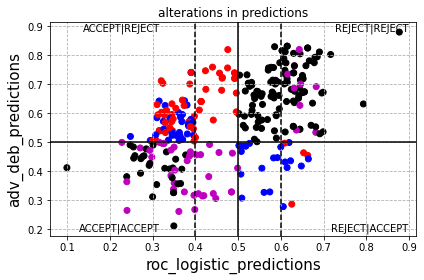

In [26]:
look = compare_advdeb_and_roc("chain_with_2_base.csv", ["logistic"], 0.1)

**DESCRIBING AND COMPARING** 

---



In [27]:
df= look[0]
print ("description of test data")
print("size:", df.shape[0])
print ("0: male 1: female")
print(df.female.value_counts())
concurring = df.copy()
concurring= df[df.logistic==df.adv_deb]
print('\n')
print ("# of instances where adv_deb and logistic_after_roc concur")
print(concurring.shape[0])
print(".........................")
print ("female distribution among concurring points")
print(concurring.female.value_counts())
print('\n')
print(".........................")
print ("description of non-concurring points")
print ("# of instances where adv_deb and logistic_after_roc dont concur")
not_concurring = df[df.logistic!= df.adv_deb]
print(not_concurring.shape[0])
print('\n')
print(".........................")
print ("adv_deb = reject and logistic_after_roc = accept")
adv_1_log_0 = not_concurring[ (not_concurring.adv_deb==1) & (not_concurring.logistic==0)]
print(adv_1_log_0.shape[0])
print ("0: male 1: female")
print(adv_1_log_0.female.value_counts())
typicalness_adv_1_log_0=find_typicalness_scores(adv_1_log_0.iloc[:,0:31])
print('\n')
print(".........................")
print ("adv_deb = accept and logistic_after_roc = reject")
adv_0_log_1 = not_concurring[(not_concurring.adv_deb==0) & (not_concurring.logistic==1)]
print(adv_0_log_1.shape[0])
print ("0: male 1: female")
print(adv_0_log_1.female.value_counts())
typicalness_adv_0_log_1=find_typicalness_scores(adv_0_log_1.iloc[:,0:31])
print('\n')
print("...... statistical test...................")
import scipy.stats as stats
print(stats.ttest_ind(a=typicalness_adv_1_log_0[0], b=typicalness_adv_0_log_1[0], equal_var=False))
print('\n')


description of test data
size: 300
0: male 1: female
0    196
1    104
Name: female, dtype: int64


# of instances where adv_deb and logistic_after_roc concur
186
.........................
female distribution among concurring points
0    139
1     47
Name: female, dtype: int64


.........................
description of non-concurring points
# of instances where adv_deb and logistic_after_roc dont concur
114


.........................
adv_deb = reject and logistic_after_roc = accept
88
0: male 1: female
1    53
0    35
Name: female, dtype: int64
n, mean and sd typicalness of female points
[53, 1.8508365966536136, 0.5263189011547356]


.........................
adv_deb = accept and logistic_after_roc = reject
26
0: male 1: female
0    22
1     4
Name: female, dtype: int64
n, mean and sd typicalness of female points
[4, 3.8125, 0.7465197027987048]


...... statistical test...................
Ttest_indResult(statistic=-5.159600990453737, pvalue=0.011748675032180838)




**TEXT IN THE PAPER**

---



p.7, Caption Fig.3 (last part)

---



Within this set, 104 data points have the ”female” attribute, and 196 ”male” attribute. For 186 out of 300 data points (47 ”female” attribute and 139 ”male” attribute) AD and ROC agree in the classiﬁcation outcome.

Regarding the remaining 114 data points for which the two methods disagree in the classiﬁcation, we have: 88 data points (53 ”female” attribute, 35 ”male” attribute) rejected by AD but accepted by ROC,

and 26 data points (4 ”female” attribute and 22 ”male” attribute) accepted by AD but rejected by ROC.

 

p.8

---



t¯(si) = 1.85 in the ACCEPT | REJECT re-gion (standard deviation sd = 0.526, data points n = 53) and t¯(si) = 3.81 in the REJECT | ACCEPT region (standard deviation sd = 0.746, data points n = 4).

The two averages proved to be signiﬁcantly diﬀerent (p − value = 0.012, t = −5.15)

 

p.12

---



bias via a probabilistic relationship (condi-tional statement) assigning the value ’defaulted’ to any given data point with ”female” attribute with probabil-ity 60%. Thus, while in the original dataset the corre-lation between ”female” attribute and ’default’ is -0.007, this stochastic treatment increases the correlation to approximately 0.18.